In [1]:
import sklearn
import numpy as np
import pickle as pkl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from funcs.utils import *
from funcs.explain import *
import shap
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from funcs.DIMV import DIMVImputation
from funcs.miss_forest import mf

missing_rate = 0.8
nruns = 10
ouput_name = 'XGBRegressor_diabetes_rate08'  

from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target 

def get_split():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), columns = diabetes.feature_names)
    X_test = pd.DataFrame(scaler.transform(X_test), columns = diabetes.feature_names)
    
    y_train, y_test = y_train.reshape((-1,1)), y_test.reshape((-1,1))
    scaler_y = StandardScaler()
    scaler_y.fit(y_train)
    y_train = pd.DataFrame(scaler_y.transform(y_train))
    y_test = pd.DataFrame(scaler_y.transform(y_test))
    X_train_star = generate_missing_data(X_train, rate=missing_rate)
    X_test_star = generate_missing_data(X_test, rate=missing_rate) 
    return X_train, X_train_star, y_train, X_test, X_test_star, y_test
chosen_model = xgboost.XGBRegressor(n_estimators=100, max_depth=2)


Instructions for updating:
non-resource variables are not supported in the long term


# Generate missing data, impute, and use SHAP to explain

In [2]:
results = []
for i in range(nruns):
    X_train, X_train_star, y_train, X_test, X_test_star, y_test = get_split()
    print('iteration:',i)
    results.append(one_run(X_train, X_train_star, y_train, X_test, X_test_star, y_test, chosen_model))

iteration: 0
Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 38.52it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.03it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 44.70it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 45.06it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 44.11it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 41.37it/s]


Validation result: best alpha 1.0, best score 0.897375723746539, scores {0.0: 1.152504510982463, 0.01: 1.090044183442938, 0.1: 1.3625205203037827, 1.0: 0.897375723746539, 10.0: 0.9645438382053263, 100.0: 0.9839129160669366}
Value alpha used in for transforming is: 1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 69.27it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 36.89it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 38.78it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 45.32it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 45.68it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 44.27it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 44.53it/s]


Validation result: best alpha 1.0, best score 0.8973757237465391, scores {0.0: 1.152504510982463, 0.01: 1.090044183442938, 0.1: 1.3625205203037827, 1.0: 0.8973757237465391, 10.0: 0.9645438382053263, 100.0: 0.9839129160669366}
Value alpha used in for transforming is: 1.0


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 166.23it/s]


loss 0.5855305504431512
loss 0.7515992131857019
loss 0.6088013759355214
loss 0.5809872611266401
loss 0.5887884233174768
loss 0.5716386611725004
loss 0.5569169461327377
loss 0.5732256730390439
loss 0.4200695601405173
loss 0.3996818993496989
number of runs used by missForest: 10
loss: 0.3996818993496989
loss 0.5703585228444074
loss 0.8554289726125754
loss 0.5591262841145509
loss 0.6504467636235505
loss 0.6645619109403665
loss 0.7387033612918573
loss 0.6670900585933749
loss 0.6763839159175123
loss 0.5919012152605736
loss 0.6238493041095239
number of runs used by missForest: 10
loss: 0.6238493041095239



100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 609.12it/s]


iteration: 1
Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 35.20it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 35.82it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 29.10it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 28.30it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 36.25it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 41.72it/s]


Validation result: best alpha 1.0, best score 0.8680179171402527, scores {0.0: 5.9827968458159235, 0.01: 1.730096902655333, 0.1: 1.0589383336201525, 1.0: 0.8680179171402527, 10.0: 0.938352440433179, 100.0: 0.9593510292747991}
Value alpha used in for transforming is: 1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 78.42it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.43it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.40it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.40it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 39.82it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 40.78it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 39.99it/s]


Validation result: best alpha 1.0, best score 0.8680179171402527, scores {0.0: 5.982796845815923, 0.01: 1.730096902655333, 0.1: 1.0589383336201525, 1.0: 0.8680179171402527, 10.0: 0.938352440433179, 100.0: 0.959351029274799}
Value alpha used in for transforming is: 1.0


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 153.17it/s]


loss 0.5509511464525166
loss 0.674735294331875
loss 0.4702652551732002
loss 0.4933334314106645
loss 0.5479377329321016
loss 0.5669597771548407
loss 0.5875188745595991
loss 0.6277085470045656
loss 0.6222690624020217
loss 0.6137478499267299
number of runs used by missForest: 10
loss: 0.6137478499267299
loss 0.565504486065607
loss 0.6343143887203533
loss 0.46319261273986173
loss 0.5528071456879388
loss 0.5192227814372258
loss 0.6111511959195464
loss 0.6117152670197646
loss 0.6809320969224706
loss 0.612559671370635
loss 0.6408638059652165
number of runs used by missForest: 10
loss: 0.6408638059652165


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 638.47it/s]


iteration: 2
Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.33it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 47.58it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.40it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 38.27it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 38.13it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 38.12it/s]


Validation result: best alpha 1.0, best score 0.89961585170266, scores {0.0: 1.2510432371902391, 0.01: 1.441882946142271, 0.1: 1.2466654542622646, 1.0: 0.89961585170266, 10.0: 0.9875357935277789, 100.0: 1.0145019435201865}
Value alpha used in for transforming is: 1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 70.25it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 45.47it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 38.43it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 38.43it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 38.36it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 43.09it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.29it/s]


Validation result: best alpha 1.0, best score 0.8996158517026599, scores {0.0: 1.2510432371902391, 0.01: 1.441882946142271, 0.1: 1.2466654542622646, 1.0: 0.8996158517026599, 10.0: 0.9875357935277789, 100.0: 1.0145019435201865}
Value alpha used in for transforming is: 1.0


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 151.04it/s]


loss 0.5353655748425817
loss 0.6202617173823959
loss 0.44951829808438826
loss 0.41171712981558434
loss 0.3897678105742086
loss 0.3716262157799318
loss 0.35371917169149514
loss 0.3016962887809012
loss 0.2940205778454189
loss 0.29429466382966624
number of runs used by missForest: 10
loss: 0.29429466382966624
loss 0.561228508535434
loss 0.6486034414586289
loss 0.4782799778854697
loss 0.47190808894964376
loss 0.4405366616875229
loss 0.4490733976101307
loss 0.4284126072567337
loss 0.3780034216469593
loss 0.37439016080711207
loss 0.37474499176734916
number of runs used by missForest: 10
loss: 0.37474499176734916


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 652.24it/s]


iteration: 3
Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 36.58it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 40.99it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 38.74it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 35.96it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 37.16it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 41.97it/s]


Validation result: best alpha 1.0, best score 0.9238840271737058, scores {0.0: 2.7129540900285423, 0.01: 1.3920444110616688, 0.1: 2.029102415551473, 1.0: 0.9238840271737058, 10.0: 0.9944143938331872, 100.0: 1.0172324579382848}
Value alpha used in for transforming is: 1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 72.59it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 38.88it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.86it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 41.84it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.70it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.54it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.38it/s]


Validation result: best alpha 1.0, best score 0.9238840271737058, scores {0.0: 2.7129540900285423, 0.01: 1.3920444110616688, 0.1: 2.029102415551473, 1.0: 0.9238840271737058, 10.0: 0.9944143938331872, 100.0: 1.0172324579382848}
Value alpha used in for transforming is: 1.0


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 199.64it/s]


loss 0.5450141024710972
loss 0.7122000175465902
loss 0.48900338084099726
loss 0.48852296595387773
loss 0.5048196618679479
loss 0.4781959262706694
loss 0.49687837372154053
loss 0.4624457136059877
loss 0.46803917543865114
loss 0.4685885153983476
number of runs used by missForest: 10
loss: 0.4685885153983476
loss 0.5240614464741834
loss 0.6682626709783931
loss 0.5378775491084499
loss 0.5149417067341935
loss 0.4995837989670073
loss 0.5062162344674923
loss 0.4866957253433735
loss 0.5000477324763271
loss 0.44036892257279875
loss 0.4539555576371398
number of runs used by missForest: 10
loss: 0.4539555576371398


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 676.70it/s]
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\scipy\stats\_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


iteration: 4
Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 37.78it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.32it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 38.26it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 40.21it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.16it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 39.62it/s]


Validation result: best alpha 1.0, best score 0.8586148026041409, scores {0.0: 2.1931180245871347, 0.01: 1.9612921463194368, 0.1: 1.035014352409509, 1.0: 0.8586148026041409, 10.0: 0.9463284546400611, 100.0: 0.9761045356034035}
Value alpha used in for transforming is: 1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 77.84it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 36.35it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.21it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.50it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 37.14it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 38.28it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.02it/s]


Validation result: best alpha 1.0, best score 0.8586148026041409, scores {0.0: 2.1931180245871347, 0.01: 1.9612921463194368, 0.1: 1.0350143524095092, 1.0: 0.8586148026041409, 10.0: 0.9463284546400611, 100.0: 0.9761045356034035}
Value alpha used in for transforming is: 1.0


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 178.27it/s]


loss 0.5229355886980249
loss 0.689665122856181
loss 0.5080058017366629
loss 0.5795502802313401
loss 0.5500127433873259
loss 0.5990035139368878
loss 0.5313410612229134
loss 0.4952623266434255
loss 0.46152998219633684
loss 0.4578015076394178
number of runs used by missForest: 10
loss: 0.4578015076394178
loss 0.5307088702623703
loss 0.6850082180297888
loss 0.4799171627720554
loss 0.49309480486926893
loss 0.49062415189340713
loss 0.48607261927277406
loss 0.4884710865944271
loss 0.5178596393683145
loss 0.46402763094709737
loss 0.5177362921812075
number of runs used by missForest: 10
loss: 0.5177362921812075


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 612.90it/s]


iteration: 5
Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 37.98it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.37it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 41.49it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 40.29it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 41.33it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 37.42it/s]


Validation result: best alpha 1.0, best score 0.8727917656710691, scores {0.0: 2.1649510524385756, 0.01: 1.7896929647681477, 0.1: 0.9338604721801179, 1.0: 0.8727917656710691, 10.0: 0.9531100322237339, 100.0: 0.9779961569234976}
Value alpha used in for transforming is: 1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 67.73it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 35.32it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 39.50it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 39.50it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 37.41it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 38.17it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 31.81it/s]


Validation result: best alpha 1.0, best score 0.8727917656710692, scores {0.0: 2.1649510524385756, 0.01: 1.789692964768148, 0.1: 0.933860472180118, 1.0: 0.8727917656710692, 10.0: 0.953110032223734, 100.0: 0.9779961569234976}
Value alpha used in for transforming is: 1.0


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 169.45it/s]


loss 0.5769705685868022
loss 0.6787481949810765
loss 0.38084339807773704
loss 0.4061732065591115
loss 0.3984750984458165
loss 0.5054373943036562
loss 0.49399306097522416
loss 0.5036777026555708
loss 0.482973458845787
loss 0.4882573635400366
number of runs used by missForest: 10
loss: 0.4882573635400366
loss 0.5629086914334865
loss 0.5795568785838056
loss 0.424594622447138
loss 0.4510573462058581
loss 0.4776423622866729
loss 0.5128314980547712
loss 0.513929222575535
loss 0.49921168614268896
loss 0.4930772021605013
loss 0.511988246846212
number of runs used by missForest: 10
loss: 0.511988246846212


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 636.83it/s]


iteration: 6
Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 37.62it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 40.62it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 39.50it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 38.72it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 39.08it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 39.97it/s]


Validation result: best alpha 1.0, best score 0.8578014395061518, scores {0.0: 1.0770574819319032, 0.01: 55.89029642808528, 0.1: 0.8610012092874706, 1.0: 0.8578014395061518, 10.0: 0.924388964576504, 100.0: 0.9451812703277369}
Value alpha used in for transforming is: 1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 71.18it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 40.47it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 38.50it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 35.97it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 37.60it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 37.87it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 36.89it/s]


Validation result: best alpha 1.0, best score 0.8578014395061518, scores {0.0: 1.0770574819319032, 0.01: 55.890296428085286, 0.1: 0.8610012092874705, 1.0: 0.8578014395061518, 10.0: 0.924388964576504, 100.0: 0.9451812703277369}
Value alpha used in for transforming is: 1.0


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 166.04it/s]


loss 0.5218690333289334
loss 0.5269047202869374
loss 0.3389233124889365
loss 0.32240719571814874
loss 0.323001425538118
loss 0.3193492979898706
loss 0.32273774602326055
loss 0.38683260766920796
loss 0.4003306291765544
loss 0.3924596476054246
number of runs used by missForest: 10
loss: 0.3924596476054246
loss 0.5232050182932149
loss 0.5091771800727608
loss 0.4414548565157017
loss 0.4761212946214731
loss 0.4603342279988992
loss 0.4093207338179276
loss 0.40049376986520074
loss 0.425060886987855
loss 0.4429787164472508
loss 0.4585750216700234
number of runs used by missForest: 10
loss: 0.4585750216700234


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 666.08it/s]
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\scipy\stats\_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


iteration: 7
Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 38.69it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.41it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 44.08it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 40.85it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 43.07it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 44.49it/s]


Validation result: best alpha 1.0, best score 0.8636711051415974, scores {0.0: 2.587909021906466, 0.01: 2.009970724601548, 0.1: 0.9455216339656214, 1.0: 0.8636711051415974, 10.0: 0.9470707613882897, 100.0: 0.9729813831092052}
Value alpha used in for transforming is: 1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 75.43it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 39.35it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 38.43it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 43.85it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 44.47it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.76it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 44.40it/s]


Validation result: best alpha 1.0, best score 0.8636711051415974, scores {0.0: 2.5879090219064667, 0.01: 2.009970724601548, 0.1: 0.9455216339656214, 1.0: 0.8636711051415974, 10.0: 0.9470707613882897, 100.0: 0.9729813831092052}
Value alpha used in for transforming is: 1.0


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 188.47it/s]


loss 0.5396858384233142
loss 0.5735697647989694
loss 0.48759019896107647
loss 0.4947113058452464
loss 0.5176707846663946
loss 0.49115496275263465
loss 0.43346702385856983
loss 0.4398649682846564
loss 0.4303683562600178
loss 0.4448611529603283
number of runs used by missForest: 10
loss: 0.4448611529603283
loss 0.567782485374222
loss 0.6500714648230539
loss 0.5465040136902628
loss 0.5096880643417759
loss 0.45808617582262345
loss 0.45620348597548344
loss 0.43652069568192897
loss 0.43906800013338476
loss 0.418104152783917
loss 0.43366346992418436
number of runs used by missForest: 10
loss: 0.43366346992418436


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 599.47it/s]
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\scipy\stats\_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


iteration: 8
Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 39.79it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 41.62it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 38.87it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 41.15it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 44.60it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.50it/s]


Validation result: best alpha 1.0, best score 0.8942944538540035, scores {0.0: 0.9230458722327364, 0.01: 0.9117869365858599, 0.1: 1.1782727687106833, 1.0: 0.8942944538540035, 10.0: 0.9725949874443052, 100.0: 0.9966924904376221}
Value alpha used in for transforming is: 1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 77.83it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 40.85it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 41.82it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.16it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.15it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 41.52it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 43.30it/s]


Validation result: best alpha 1.0, best score 0.8942944538540035, scores {0.0: 0.9230458722327364, 0.01: 0.91178693658586, 0.1: 1.1782727687106833, 1.0: 0.8942944538540035, 10.0: 0.9725949874443052, 100.0: 0.9966924904376221}
Value alpha used in for transforming is: 1.0


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 208.29it/s]


loss 0.6018858817126879
loss 0.7147558624124524
loss 0.43840474988794914
loss 0.504366787681065
loss 0.4780410927986339
loss 0.45458827217448206
loss 0.4505949698835565
loss 0.44731249756186775
loss 0.4591500355916116
loss 0.4604406001743932
number of runs used by missForest: 10
loss: 0.4604406001743932
loss 0.5930314259432075
loss 0.6815399182146005
loss 0.5405288048120324
loss 0.51069551804992
loss 0.49460013566790784
loss 0.5190245352580805
loss 0.5033717395980923
loss 0.5214201206151208
loss 0.4945206172064153
loss 0.48433465011417437
number of runs used by missForest: 10
loss: 0.48433465011417437


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 601.34it/s]
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\scipy\stats\_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


iteration: 9
Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 31.87it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 43.07it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 43.71it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.00it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 44.13it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.18it/s]


Validation result: best alpha 1.0, best score 0.8827914041892274, scores {0.0: 3.5431430640855295, 0.01: 1.3384113060044136, 0.1: 1.2656743637101469, 1.0: 0.8827914041892274, 10.0: 0.9662005864553372, 100.0: 0.9923358847369539}
Value alpha used in for transforming is: 1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 79.09it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 41.92it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 39.26it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 39.40it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 40.96it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 40.17it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 41.88it/s]


Validation result: best alpha 1.0, best score 0.8827914041892274, scores {0.0: 3.5431430640855295, 0.01: 1.3384113060044136, 0.1: 1.2656743637101469, 1.0: 0.8827914041892274, 10.0: 0.9662005864553372, 100.0: 0.9923358847369539}
Value alpha used in for transforming is: 1.0


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 208.08it/s]


loss 0.5521088672194441
loss 0.6933721110787864
loss 0.5840791942512801
loss 0.6170751641355157
loss 0.6063630567438876
loss 0.6261337310908172
loss 0.62803562705099
loss 0.6733945770884509
loss 0.645484521558806
loss 0.615784217849684
number of runs used by missForest: 10
loss: 0.615784217849684
loss 0.580220449051328
loss 0.7119052901925529
loss 0.5325438600102071
loss 0.566253492932131
loss 0.5498332801536595
loss 0.5850600858386226
loss 0.568384236292513
loss 0.5882542125969118
loss 0.5631212228688345
loss 0.5815963898931745
number of runs used by missForest: 10
loss: 0.5815963898931745


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 591.91it/s]
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\scipy\stats\_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


So, the first layer of results is the result of each run. Then, for the sub-level:
- level 0: shape_values_ori, shap_values_xm...
- level 1:  other_measures = [mse_imputation_all, mse_shap_all, mse_ypred_all, cor_ypred_all, spearman_ypred]

In [3]:
def get_average_shap_vals(results, j, nruns):
    # get the average shap values from all runs for each imputation method or the original 
    current = results[0][0][j]
    for i in range(1, nruns):
        current.values += results[i][0][j].values
        current.base_values += results[i][0][j].base_values
        current.data += results[i][0][j].data  
    current.values = current.values/nruns
    current.base_values = current.base_values/nruns
    current.data = current.data/nruns
    return current

In [4]:
shap_values_ori = get_average_shap_vals(results, j = 0, nruns= nruns)
shap_values_xm = get_average_shap_vals(results, j = 1, nruns= nruns)
shap_values_mi = get_average_shap_vals(results, j = 2, nruns = nruns)
shap_values_mice = get_average_shap_vals(results, j = 3, nruns= nruns)
shap_values_dimv = get_average_shap_vals(results, j = 4, nruns= nruns)
shap_values_mf = get_average_shap_vals(results, j = 5, nruns= nruns)
shap_values_soft = get_average_shap_vals(results, j = 6, nruns= nruns)
shap_values_gain = get_average_shap_vals(results, j = 7, nruns= nruns)

In [5]:
ranking_res = shap_ranking_table(X_train, shap_values_ori,shap_values_xm, shap_values_mi, shap_values_mice,
                   shap_values_dimv, shap_values_mf, shap_values_soft, shap_values_gain)

combined_feature_importance
\begin{tabular}{lrrrrrrrr}
\toprule
 & Original & Xgb on missing data & Mean Imputation & MICE & DIMV & missForest & SOFT-IMPUTE & GAIN \\
Ranking &  &  &  &  &  &  &  &  \\
\midrule
s5 & 0.096 & 0.370 & 0.059 & 0.061 & 0.071 & 0.054 & 0.058 & 0.073 \\
bmi & 0.090 & 0.821 & 0.051 & 0.042 & 0.051 & 0.056 & 0.059 & 0.043 \\
bp & 0.038 & 0.591 & 0.038 & 0.049 & 0.041 & 0.054 & 0.038 & 0.051 \\
s6 & 0.034 & 0.180 & 0.049 & 0.045 & 0.040 & 0.046 & 0.038 & 0.040 \\
s3 & 0.033 & 0.023 & 0.049 & 0.050 & 0.042 & 0.050 & 0.038 & 0.063 \\
age & 0.030 & 0.059 & 0.028 & 0.029 & 0.032 & 0.040 & 0.028 & 0.042 \\
sex & 0.029 & 0.046 & 0.012 & 0.022 & 0.030 & 0.018 & 0.029 & 0.007 \\
s2 & 0.027 & 0.141 & 0.025 & 0.037 & 0.043 & 0.040 & 0.040 & 0.035 \\
s1 & 0.026 & 0.120 & 0.038 & 0.032 & 0.034 & 0.039 & 0.036 & 0.044 \\
s4 & 0.016 & 0.027 & 0.030 & 0.045 & 0.035 & 0.048 & 0.038 & 0.029 \\
\bottomrule
\end{tabular}



In [6]:
    j = 0
    mse_now = results[0][1][j]
    for i in range(1, nruns):
        mse_now += results[i][1][j]
    mse_imputation_all = mse_now/nruns  
    print("the MSE between the imputed X_test of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original X_test:")
    print(mse_imputation_all.round(3))

    j = 1
    mse_now = results[0][1][j]
    for i in range(1, nruns):
        mse_now += results[i][1][j]    
    mse_shap_all = mse_now/nruns 
    print("the MSE between the Shapley values of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original:")
    print(mse_shap_all.round(3))

    j = 2
    mse_ypred_now = results[0][1][j]
    for i in range(1, nruns):
        mse_ypred_now += results[i][1][j]    
    mse_ypred_all = mse_ypred_now/nruns 
    print("the MSE between y predicted on test set of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original:")
    print(mse_ypred_all.round(3))

    j = 3
    mse_ypred_now = results[0][1][j]
    for i in range(1, nruns):
        mse_ypred_now += results[i][1][j]    
    spearman_ypred = mse_ypred_now/nruns 
    print("the ranking correlation for spearman rank correlation between the predicted y on test set of original data and y predicted on imputed data")
    print(spearman_ypred.round(3))

    j = 4
    mse_ypred_now = results[0][1][j]
    for i in range(1, nruns):
        mse_ypred_now += results[i][1][j]    
    spearman_ypred = mse_ypred_now/nruns 
    print("the ranking correlation for spearman rank correlation between imputed features")
    print(spearman_ypred.round(3))

the MSE between the imputed X_test of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original X_test:
[0.819 0.863 0.737 0.942 0.752 1.261]
the MSE between the Shapley values of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original:
[0.224 0.049 0.051 0.05  0.058 0.048 0.055]
the MSE between y predicted on test set of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original:
[0.549 0.535 0.563 0.574 0.66  0.555 0.603]
the ranking correlation for spearman rank correlation between the predicted y on test set of original data and y predicted on imputed data
[[0.448 0.   ]
 [0.459 0.001]
 [0.444 0.012]
 [0.423 0.01 ]
 [0.367 0.025]
 [0.44  0.01 ]
 [0.357 0.013]]
the ranking correlation for spearman rank correlation between imputed features
[[ 0.067  0.216  0.05   0.059  0.163  0.108  0.165  0.015  0.228  0.088]
 [ 0.091    nan  0.282  0.14  -0.025 -0.027  0.22   0.079  0.427  0.112]
 [ 0.02   0.126  0.164  0.175  0.026  0.082  0.187  0.128  0.339 

In [7]:
dfplot = pd.DataFrame({'MSE':np.hstack((0,mse_imputation_all)), 'Spearman statistic': spearman_ypred[:,0]}, index = ['Xgb on missing data','Mean Imputation','MICE','DIMV','missForest','SOFT-IMPUTE', 'GAIN'])
dfplot

,MSE,Spearman statistic
Xgb on missing data,0.000000,0.066518
Mean Imputation,0.819150,0.090631
MICE,0.862909,0.019583
DIMV,0.737023,0.034386
missForest,0.941681,0.087888
SOFT-IMPUTE,0.751963,0.067611
GAIN,1.261300,0.055659


imputation MSE versus Spearman statistic


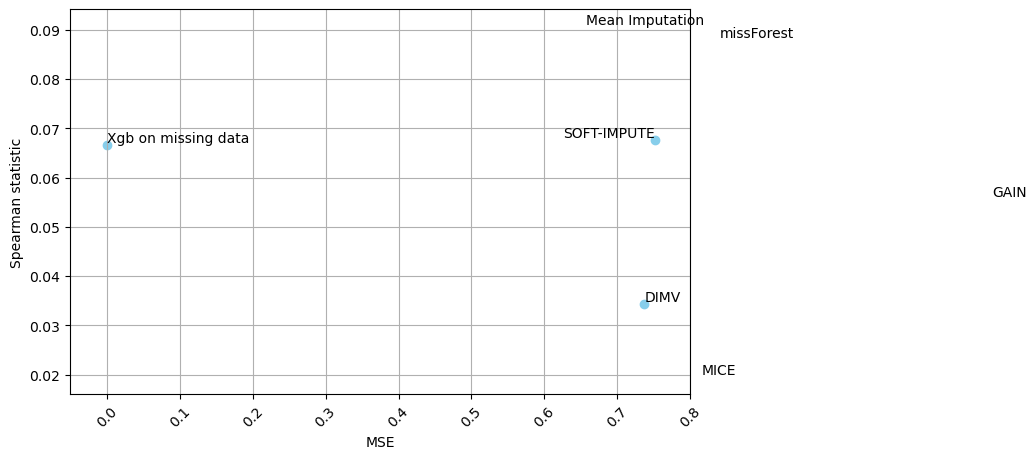

In [8]:
print('imputation MSE versus Spearman statistic')
plt.figure(figsize=(8, 5))
plt.scatter(dfplot['MSE'], dfplot['Spearman statistic'], color='skyblue')
for i, row in dfplot.iterrows():
    if (row.name == 'Xgb on missing data') or (row.name == 'DIMV'):
        plt.text(row['MSE'],row['Spearman statistic'], row.name, ha='left', va='bottom')
    else:
        plt.text(row['MSE'],row['Spearman statistic'], row.name, ha='right', va='bottom') 
plt.ylabel('Spearman statistic')
plt.xlabel('MSE')
plt.xlim(-.05, .8)
plt.xticks(rotation=45)
plt.grid(True)  # Adding grid for better visualization
plt.savefig('results/'+ ouput_name+'imputation_mse_spearman'+'.png',bbox_inches='tight')
plt.show()

In [9]:
dfplot = pd.DataFrame({'MSE on y test':mse_ypred_all, 'MSE Shap': mse_shap_all}, index = dfplot.index)
dfplot

,MSE on y test,MSE Shap
Xgb on missing data,0.549176,0.223589
Mean Imputation,0.535307,0.048577
MICE,0.562724,0.051323
DIMV,0.574117,0.050296
missForest,0.659560,0.057661
SOFT-IMPUTE,0.555138,0.048178
GAIN,0.602709,0.055118


imputation MSE versus Shapley MSE


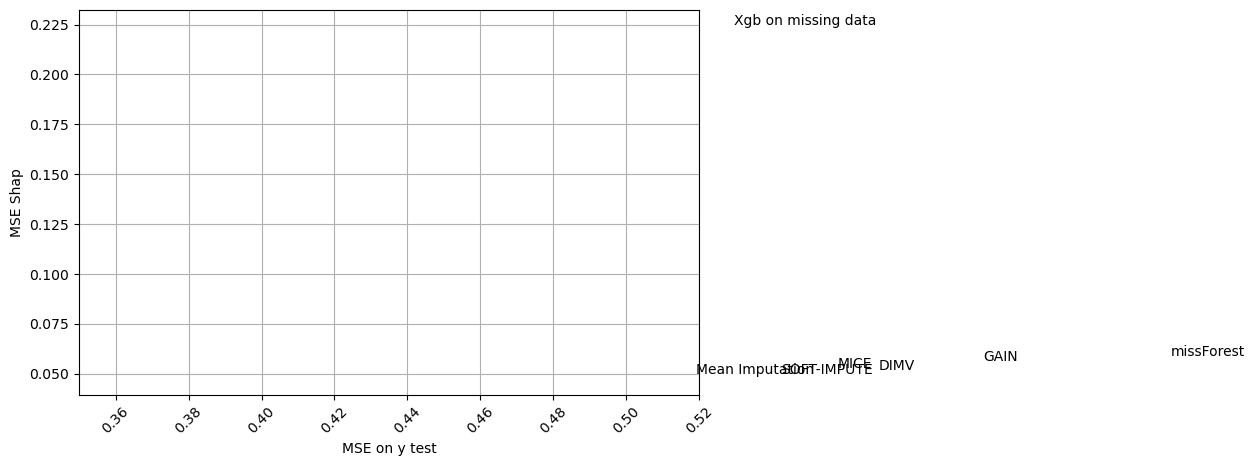

In [10]:
print('imputation MSE versus Shapley MSE')
plt.figure(figsize=(8, 5))
plt.scatter(dfplot['MSE on y test'],dfplot['MSE Shap'], color='skyblue')
for i, row in dfplot.iterrows():
    plt.text(row['MSE on y test'],row['MSE Shap'], row.name, ha='center', va='bottom')
plt.ylabel('MSE Shap')
plt.xlabel('MSE on y test')
plt.xlim(.35, .52)
plt.xticks(rotation=45)
plt.grid(True)  # Adding grid for better visualization
plt.savefig('results/'+ ouput_name+'imputation_mse_vs_shap_mse'+'.png',bbox_inches='tight')
plt.show()

In [11]:
dfplot = pd.DataFrame({'MSE':np.hstack((0,mse_imputation_all)), 'MSE Shap': mse_shap_all}, index = dfplot.index)
dfplot

,MSE,MSE Shap
Xgb on missing data,0.000000,0.223589
Mean Imputation,0.819150,0.048577
MICE,0.862909,0.051323
DIMV,0.737023,0.050296
missForest,0.941681,0.057661
SOFT-IMPUTE,0.751963,0.048178
GAIN,1.261300,0.055118


imputation MSE versus Shapley MSE


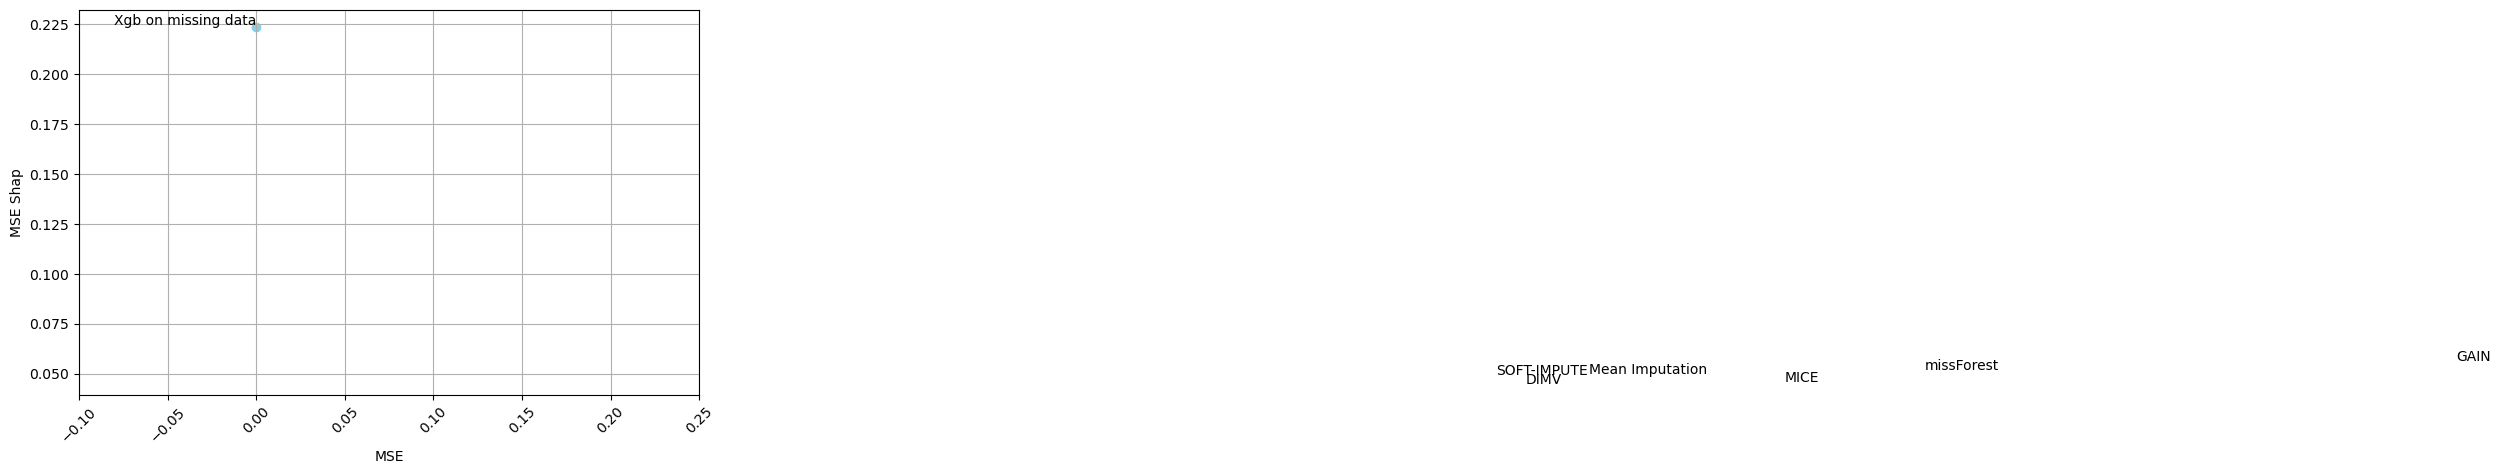

In [12]:
print('imputation MSE versus Shapley MSE')
plt.figure(figsize=(8, 5))
plt.scatter(dfplot['MSE'],dfplot['MSE Shap'], color='skyblue')
for i, row in dfplot.iterrows():
    if (row.name == 'missForest') or (row.name == 'MICE'):
        plt.text(row['MSE'],row['MSE Shap'], row.name, ha='left', va='top')
    else:
        if  (row.name == 'DIMV'):
            plt.text(row['MSE'],row['MSE Shap'], row.name, ha='right', va='top')
        else:
            plt.text(row['MSE'],row['MSE Shap'], row.name, ha='right', va='bottom')     
plt.ylabel('MSE Shap')
plt.xlabel('MSE')
plt.xlim(-0.1, .25)
plt.xticks(rotation=45)
plt.grid(True)  # Adding grid for better visualization
plt.savefig('results/'+ ouput_name+'imputation_mse_vs_shap_mse'+'.png',bbox_inches='tight')
plt.show()

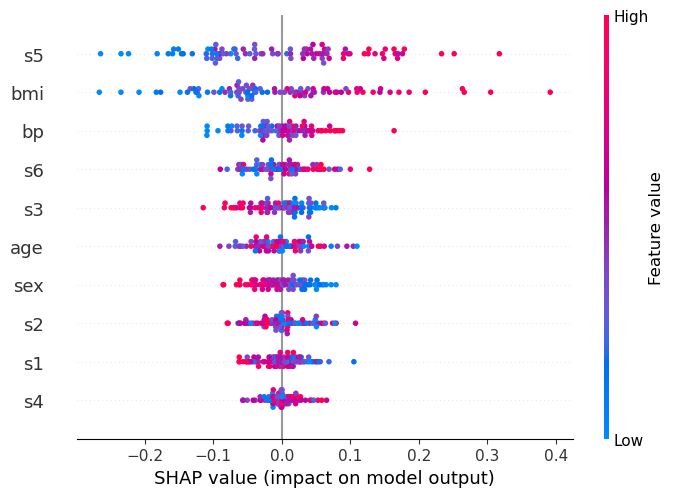

In [13]:
plt.figure()
shap.plots.beeswarm(shap_values_ori, max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'ori'+'.png',bbox_inches='tight')
plt.show()

C:\Users\thung\.conda\envs\mtime\Lib\site-packages\numpy\lib\nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


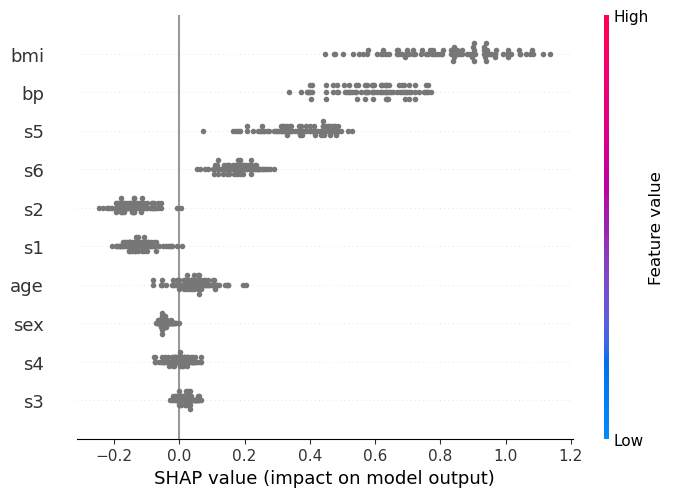

In [14]:
plt.figure()
shap.plots.beeswarm(shap_values_xm, max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'xm'+'.png',bbox_inches='tight')
plt.show()

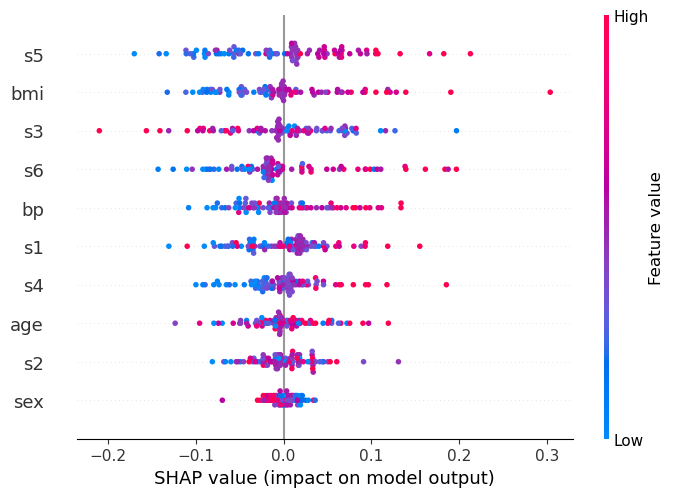

In [15]:
plt.figure()
shap.plots.beeswarm(shap_values_mi, max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'mi'+'.png',bbox_inches='tight')
plt.show()

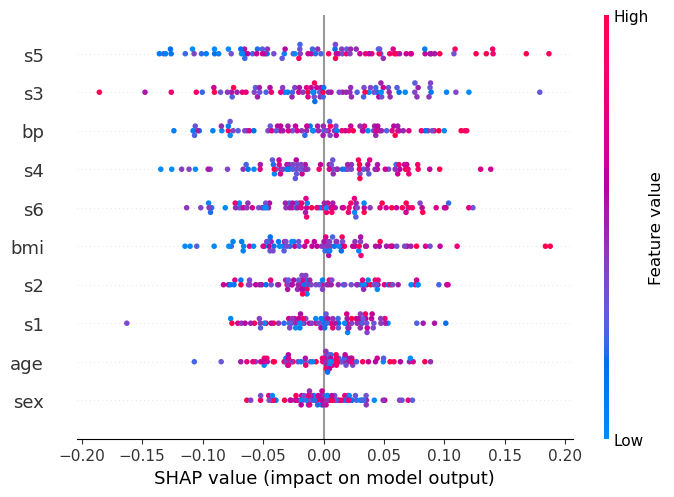

In [16]:
plt.figure()
shap.plots.beeswarm(shap_values_mice, max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'mice'+'.png',bbox_inches='tight')
plt.show()

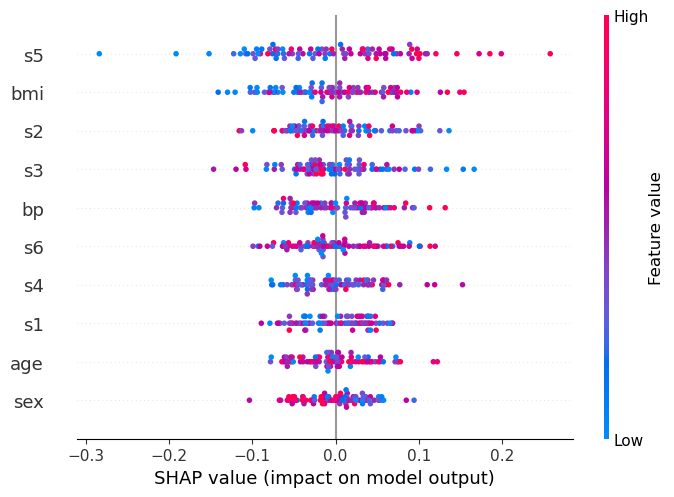

In [17]:
plt.figure()
shap.plots.beeswarm(shap_values_dimv, max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'dimv'+'.png',bbox_inches='tight')
plt.show()

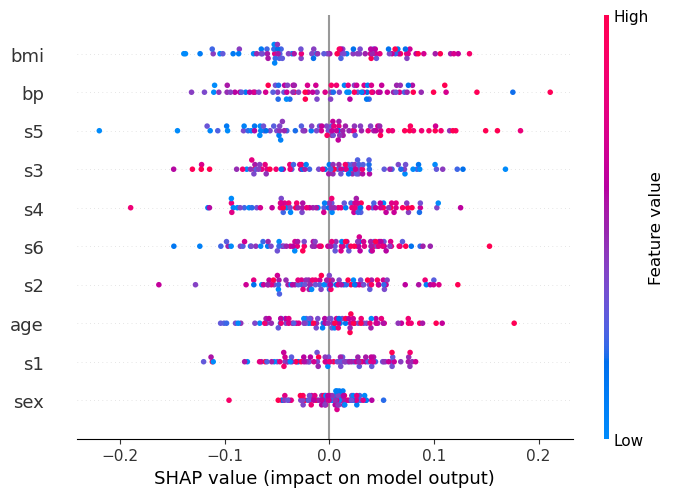

In [18]:
plt.figure()
shap.plots.beeswarm(shap_values_mf, max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'mf'+'.png',bbox_inches='tight')
plt.show()

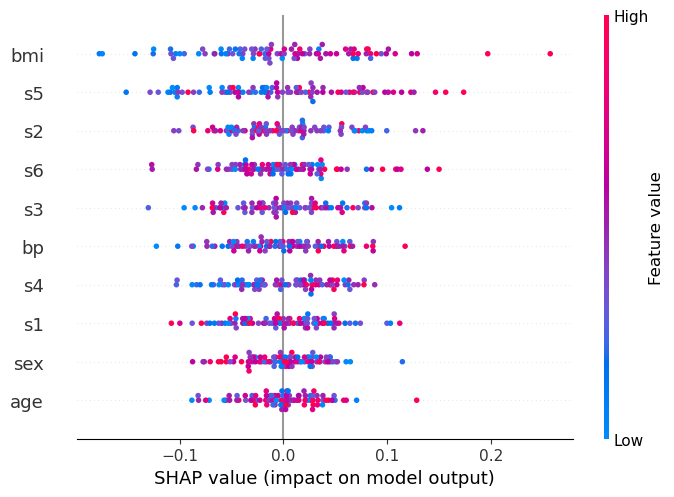

In [19]:
plt.figure()
shap.plots.beeswarm(shap_values_soft, max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'soft'+'.png',bbox_inches='tight')
plt.show()

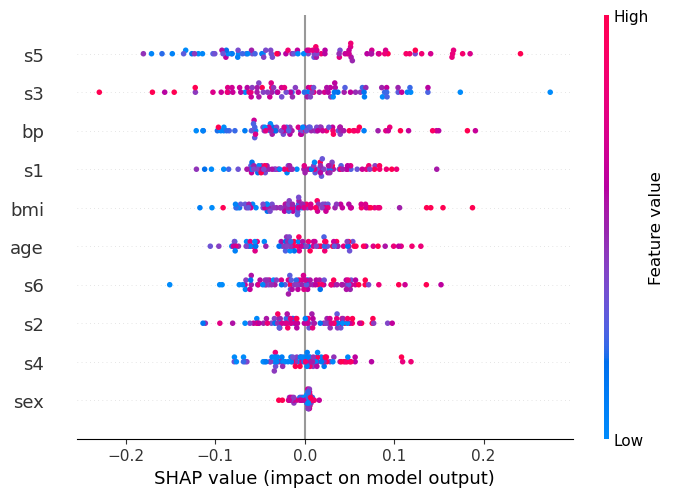

In [20]:
plt.figure()
shap.plots.beeswarm(shap_values_gain, max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'gain'+'.png',bbox_inches='tight')
plt.show()

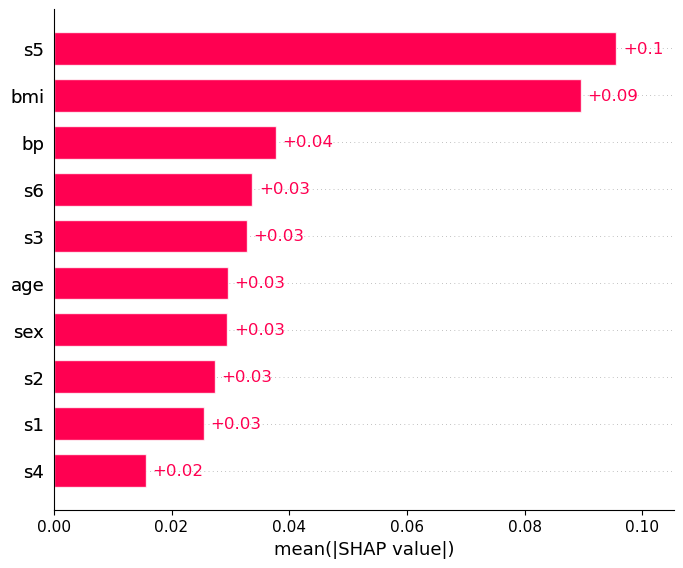

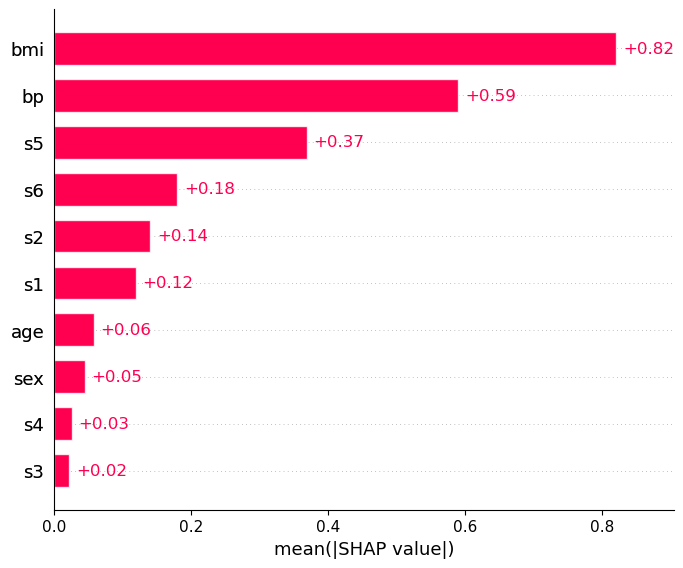

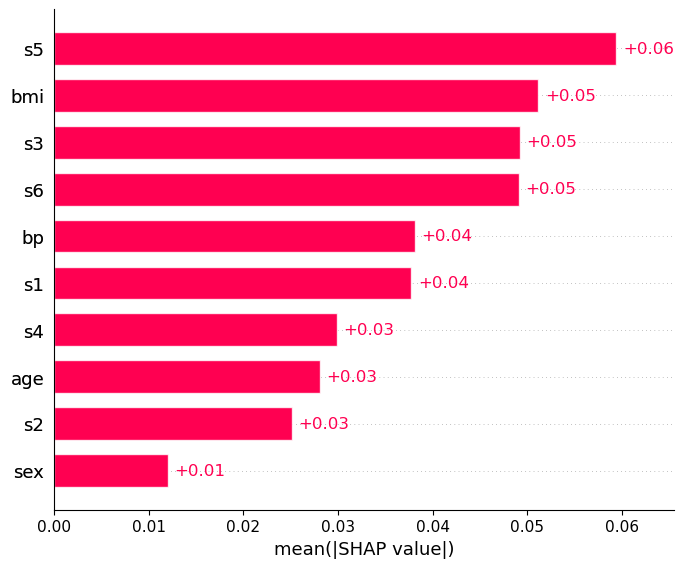

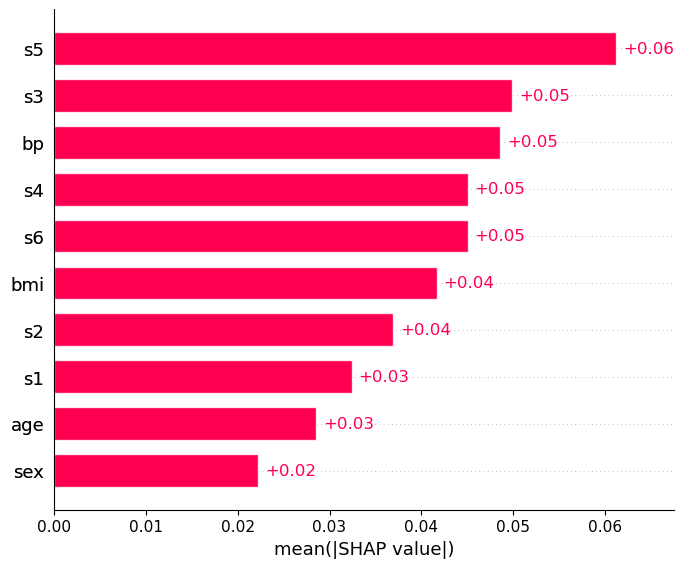

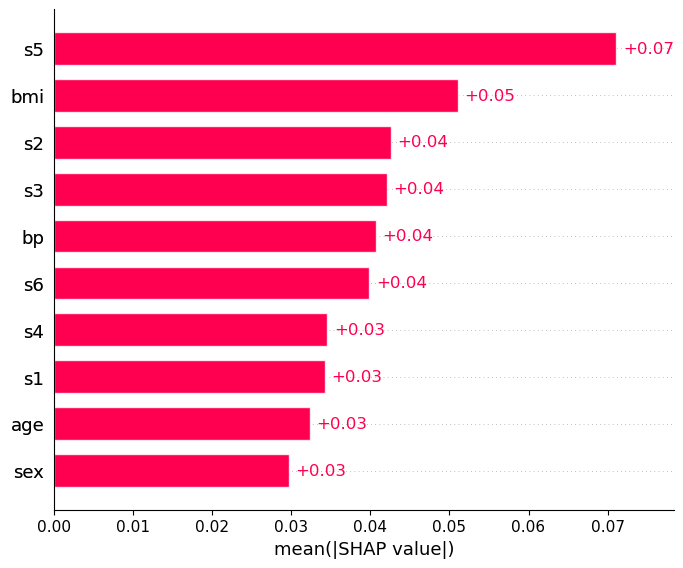

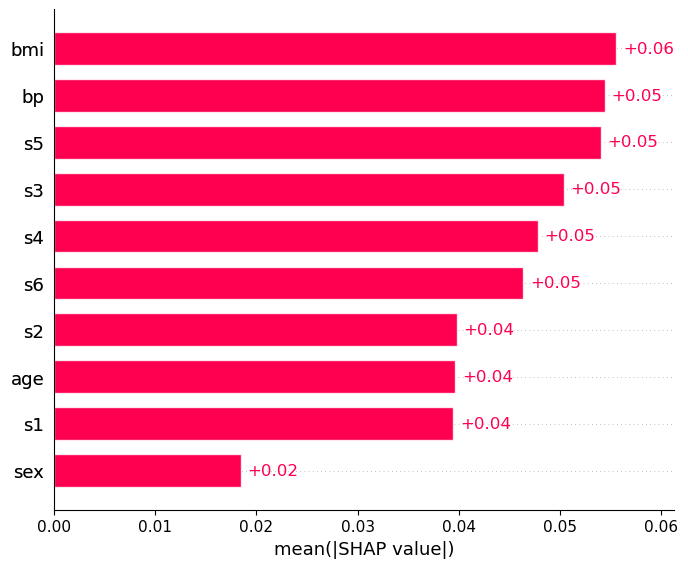

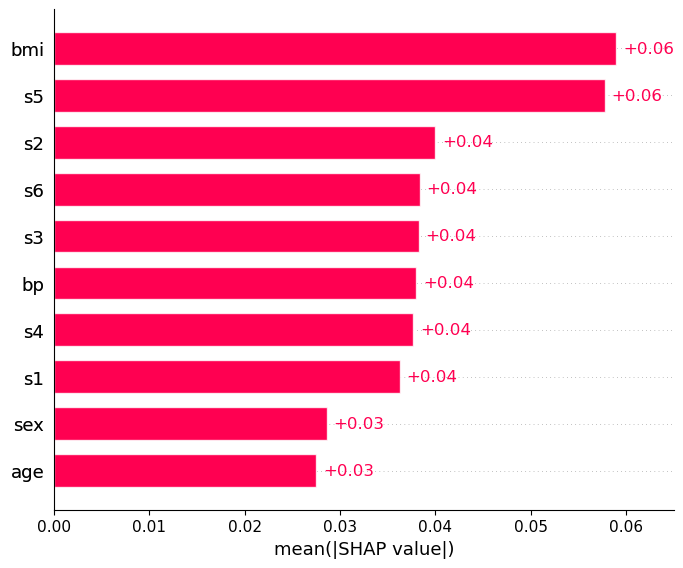

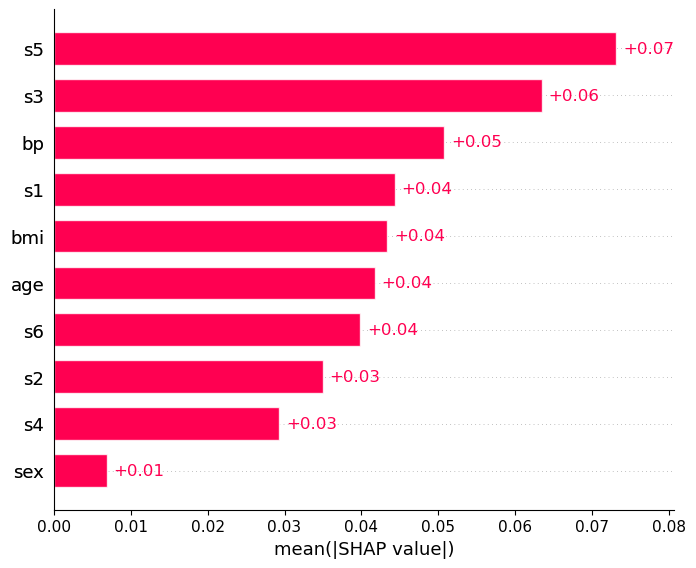

In [21]:
plt.figure()
shap.plots.bar(shap_values_ori, show=False)
plt.savefig('results/'+ouput_name+'bar_ori'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_xm, show=False)
plt.savefig('results/'+ouput_name+'bar_xm'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_mi, show=False)
plt.savefig('results/'+ouput_name+'bar_mi'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_mice, show=False)
plt.savefig('results/'+ouput_name+'bar_mice'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_dimv, show=False)
plt.savefig('results/'+ouput_name+'bar_dimv'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_mf, show=False)
plt.savefig('results/'+ouput_name+'bar_mf'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_soft, show=False)
plt.savefig('results/'+ouput_name+'bar_soft'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_gain, show=False)
plt.savefig('results/'+ouput_name+'bar_gain'+'.png',bbox_inches='tight')


<Figure size 6400x4800 with 0 Axes>

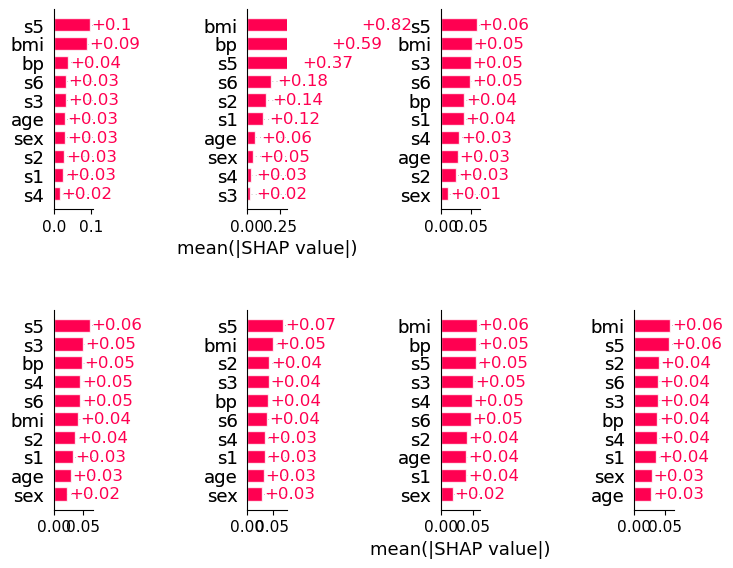

In [22]:
plt.figure(dpi=1000)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(200,100))
plt.sca(axes[0,0])
shap.plots.bar(shap_values_ori, show=False)
plt.sca(axes[0,1])
shap.plots.bar(shap_values_xm, show=False)
plt.sca(axes[0,2])
shap.plots.bar(shap_values_mi, show=False)
plt.sca(axes[1,0])
shap.plots.bar(shap_values_mice, show=False)
plt.sca(axes[1,1])
shap.plots.bar(shap_values_dimv, show=False)
plt.sca(axes[1,2])
shap.plots.bar(shap_values_mf, show=False)
plt.sca(axes[1,3])
shap.plots.bar(shap_values_soft, show=False)
axes[0,3].set_visible(False)
axes[0,0].set_xlabel('')
axes[0,1].set_xlim(0,0.3)
axes[1,1].set_xlabel('')
axes[0,2].set_xlabel('')
axes[1,0].set_xlabel('')
axes[1,3].set_xlabel('')
axes[0,1].set_ylabel('')
axes[0,2].set_ylabel('')
axes[1,1].set_ylabel('')
plt.subplots_adjust(wspace=3.9, hspace = .5) 
plt.savefig('results/'+ouput_name+'bar'+'.png',bbox_inches='tight')
plt.show()

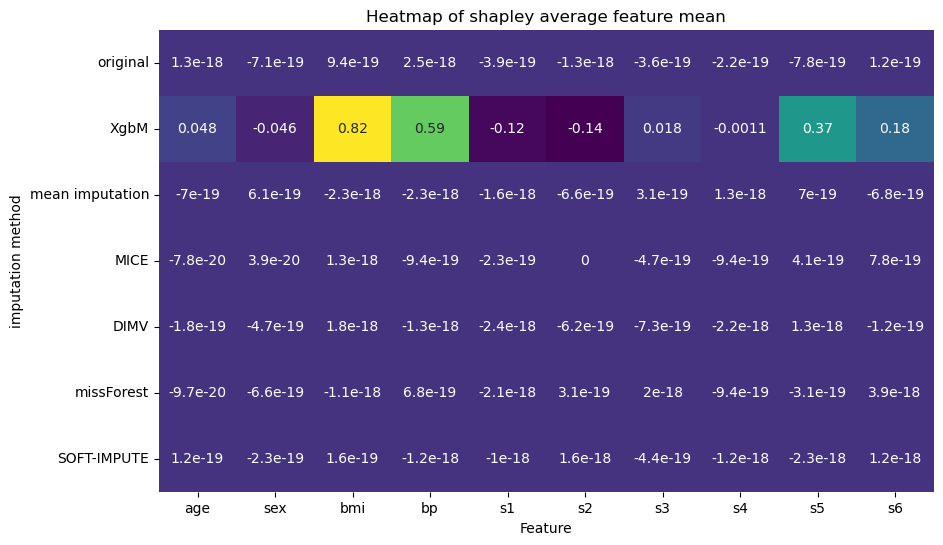

In [23]:
column_mean_ori = np.mean(shap_values_ori.values, axis=0)
column_mean_xm = np.mean(shap_values_xm.values, axis=0)
column_mean_mi = np.mean(shap_values_mi.values, axis=0)
column_mean_mice = np.mean(shap_values_mice.values, axis=0)
column_mean_dimv = np.mean(shap_values_dimv.values, axis=0)
column_mean_mf = np.mean(shap_values_mf.values, axis=0)
column_mean_soft = np.mean(shap_values_soft.values, axis=0)
heat_df = pd.DataFrame(np.vstack((column_mean_ori, column_mean_xm,column_mean_mi,column_mean_mice,
                                  column_mean_dimv,column_mean_mf,column_mean_soft)))
heat_df.columns = X_train.columns
heat_df.index = np.array(['original', 'XgbM', 'mean imputation', 'MICE','DIMV','missForest', 'SOFT-IMPUTE'])
plt.figure(figsize=(10, 6))
sns.heatmap(heat_df, cmap='viridis', annot=True, cbar=False)
plt.title('Heatmap of shapley average feature mean')
plt.xlabel('Feature')
plt.ylabel('imputation method')
plt.savefig('results/'+ouput_name+'heatmap'+'.png',bbox_inches='tight')
plt.show()